2/2 [==============================] - 0s 13ms/step
Epoch 0/2000 [D loss: 1.0626522898674011 | D accuracy: 0.0] [G loss: 0.8294005393981934]
1/1 [==============================] - 0s 99ms/step


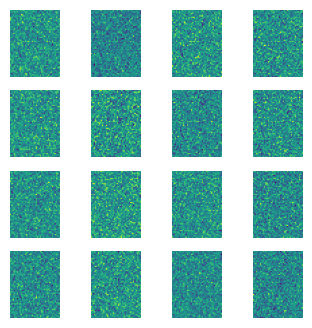

2/2 [==============================] - 0s 10ms/step
Epoch 100/2000 [D loss: 0.1049507100979099 | D accuracy: 100.0] [G loss: 5.104400634765625]
1/1 [==============================] - 0s 26ms/step


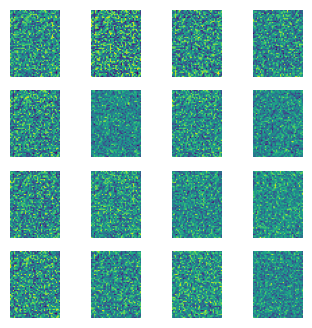

2/2 [==============================] - 0s 19ms/step
Epoch 200/2000 [D loss: 0.019066767767071724 | D accuracy: 100.0] [G loss: 104.24987030029297]
1/1 [==============================] - 0s 35ms/step


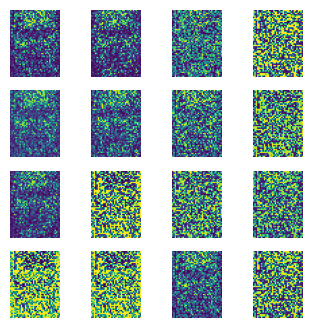

2/2 [==============================] - 0s 11ms/step
Epoch 300/2000 [D loss: 0.0031122997135071273 | D accuracy: 100.0] [G loss: 25.934463500976562]
1/1 [==============================] - 0s 23ms/step


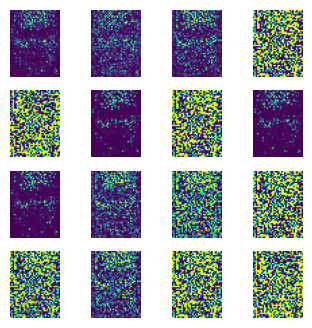

2/2 [==============================] - 0s 9ms/step
Epoch 400/2000 [D loss: 0.00047400639323313953 | D accuracy: 100.0] [G loss: 32.06536102294922]
1/1 [==============================] - 0s 29ms/step


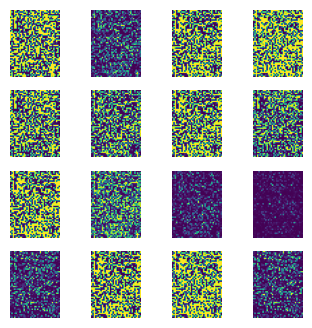

2/2 [==============================] - 0s 11ms/step
Epoch 500/2000 [D loss: 0.0024818204110488296 | D accuracy: 100.0] [G loss: 267.1561279296875]
1/1 [==============================] - 0s 32ms/step


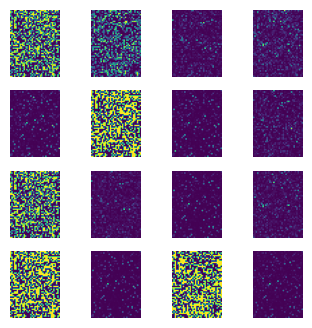

2/2 [==============================] - 0s 12ms/step
Epoch 600/2000 [D loss: 0.010740537196397781 | D accuracy: 100.0] [G loss: 103.91588592529297]
1/1 [==============================] - 0s 22ms/step


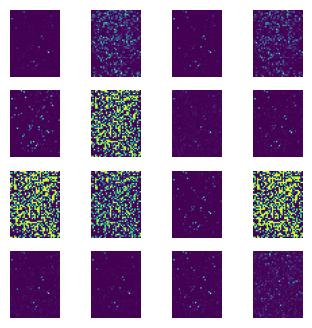

2/2 [==============================] - 0s 11ms/step
Epoch 700/2000 [D loss: 0.03433434572070837 | D accuracy: 99.21875] [G loss: 112.43417358398438]
1/1 [==============================] - 0s 23ms/step


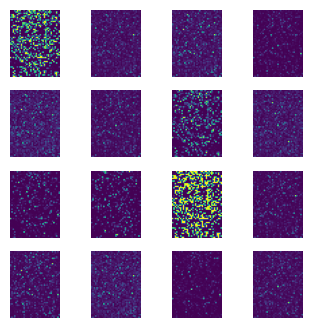

2/2 [==============================] - 0s 14ms/step
Epoch 800/2000 [D loss: 0.07754701375961304 | D accuracy: 96.875] [G loss: 117.70235443115234]
1/1 [==============================] - 0s 36ms/step


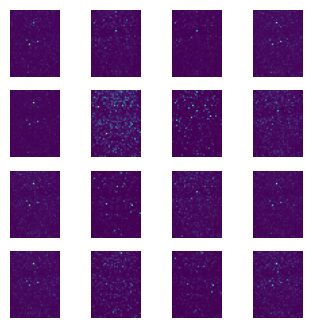

2/2 [==============================] - 0s 11ms/step
Epoch 900/2000 [D loss: 0.03233523108065128 | D accuracy: 99.21875] [G loss: 21.847576141357422]
1/1 [==============================] - 0s 25ms/step


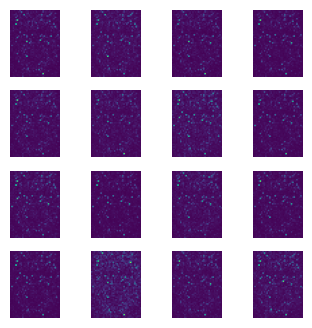

2/2 [==============================] - 0s 11ms/step
Epoch 1000/2000 [D loss: 0.05473037622869015 | D accuracy: 99.21875] [G loss: 5.922239303588867]
1/1 [==============================] - 0s 32ms/step


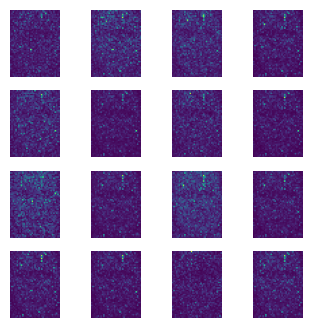

2/2 [==============================] - 0s 11ms/step
Epoch 1100/2000 [D loss: 0.13210739940404892 | D accuracy: 100.0] [G loss: 3.6636552810668945]
1/1 [==============================] - 0s 38ms/step


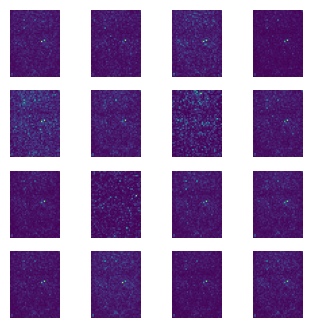

2/2 [==============================] - 0s 12ms/step
Epoch 1200/2000 [D loss: 0.24384133517742157 | D accuracy: 100.0] [G loss: 2.47383713722229]
1/1 [==============================] - 0s 35ms/step


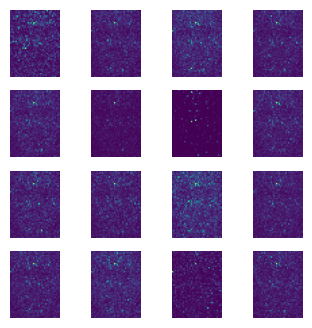

2/2 [==============================] - 0s 7ms/step
Epoch 1300/2000 [D loss: 0.2327483519911766 | D accuracy: 100.0] [G loss: 2.8638930320739746]
1/1 [==============================] - 0s 25ms/step


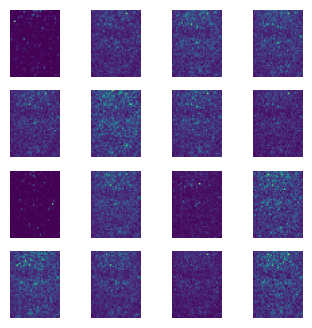

2/2 [==============================] - 0s 9ms/step
Epoch 1400/2000 [D loss: 0.25498680770397186 | D accuracy: 99.21875] [G loss: 3.1073732376098633]
1/1 [==============================] - 0s 23ms/step


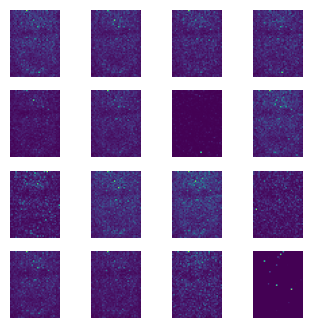

2/2 [==============================] - 0s 10ms/step
Epoch 1500/2000 [D loss: 0.45433157682418823 | D accuracy: 82.8125] [G loss: 2.8237969875335693]
1/1 [==============================] - 0s 25ms/step


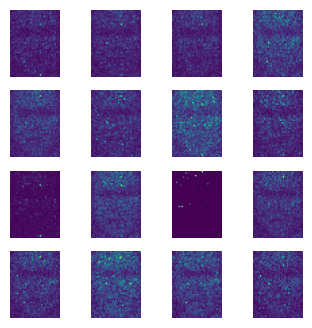

2/2 [==============================] - 0s 9ms/step
Epoch 1600/2000 [D loss: 0.45908287167549133 | D accuracy: 80.46875] [G loss: 3.0141806602478027]
1/1 [==============================] - 0s 30ms/step


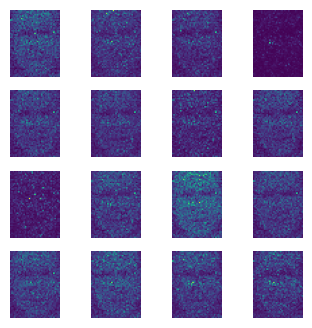

2/2 [==============================] - 0s 8ms/step
Epoch 1700/2000 [D loss: 0.33007773756980896 | D accuracy: 96.09375] [G loss: 2.391160488128662]
1/1 [==============================] - 0s 34ms/step


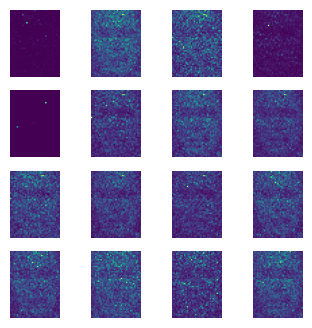

2/2 [==============================] - 0s 11ms/step
Epoch 1800/2000 [D loss: 0.4427482783794403 | D accuracy: 82.03125] [G loss: 3.6028151512145996]
1/1 [==============================] - 0s 31ms/step


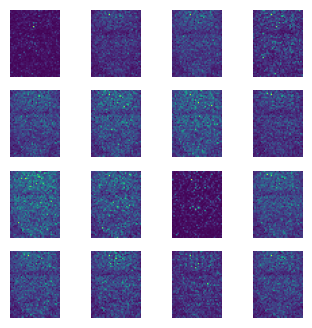

2/2 [==============================] - 0s 10ms/step
Epoch 1900/2000 [D loss: 0.45818379521369934 | D accuracy: 84.375] [G loss: 2.3069562911987305]
1/1 [==============================] - 0s 25ms/step


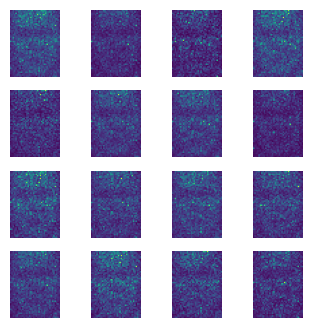

2/2 [==============================] - 0s 9ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

# Load and preprocess the Labeled Faces in the Wild (LFW) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
x_train = lfw_people.images / 255.0  # Normalize to [0, 1]
x_train = np.expand_dims(x_train, axis=-1)

# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(np.prod(img_shape), activation='sigmoid'))
    model.add(layers.Reshape(img_shape))
    return model

# Define the discriminator model
def build_discriminator(img_shape):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Build and compile the discriminator
img_shape = (50, 37, 1)  # Adjust based on the shape of the LFW images
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# Build and compile the generator
latent_dim = 100
generator = build_generator(latent_dim)

# Combined model (generator and discriminator)
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002))

# Training the GAN
epochs = 5000
batch_size = 64

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]
    labels_real = np.ones((batch_size, 1))

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_imgs = generator.predict(noise)
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_imgs, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_imgs, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    labels_gen = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, labels_gen)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

        # Save generated images at specified intervals
        if epoch % 100 == 0:
            samples = generator.predict(np.random.normal(0, 1, (16, latent_dim)))
            samples = 0.5 * (samples + 1.0)
            plt.figure(figsize=(4, 4))
            for i in range(16):
                plt.subplot(4, 4, i + 1)
                plt.imshow(samples[i, :, :, 0], cmap='viridis')
                plt.axis('off')
            plt.show()
